In [300]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pylab
from pylab import *

import warnings
warnings.filterwarnings('ignore')

In [400]:
# Загрузим выборки с данными по Ямало-Ненецкому автономному округу
billuten = pd.read_csv('data/izbir/izbir_billuten.csv', sep='\t', index_col = 0) # Данные по биллютеням
partii_percent = pd.read_csv('data/izbir/izbir_partii_percent.csv', sep='\t', index_col = 0) # Данные по партиям в процентах
partii_number = pd.read_csv('data/izbir/izbir_partii.csv', sep='\t', error_bad_lines=False, index_col = 0) # Данные по партиям (количество)
otcrep = pd.read_csv('data/izbir/otcrep.csv', sep='\t', error_bad_lines=False, index_col = 0) # Данные по открепительным удостоверениям

In [272]:
# Выборка с данными по биллютеням
del billuten['Сумма']
billuten[:5]

,Губкинская городская,Красноселькупская,Лабытнангская городская,Муравленковская городская,Надымская,Новоуренгойская городская,Ноябрьская городская,Приуральская,Пуровская,Салехардская городская,Тазовская,Шурышкарская,Ямальская
"Число избирателей, внесенных в список избирателей на момент окончания голосования",15644,5032,14905,21518,48127,65162,71062,9039,37715,28515,14873,5825,18226
"Число избирательных бюллетеней, полученных участковой избирательной комиссией",14100,4969,13400,19073,46300,57828,69400,9150,35650,57654,18900,6160,20800
"Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно",0,908,0,0,4591,0,0,1533,4372,0,5166,400,5286
"Число избирательных бюллетеней, выданных в помещении для голосования в день голосования",10526,3686,9804,15376,32329,45107,50095,5585,26436,18380,7721,4072,10997
"Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования",58,112,279,62,396,172,264,202,120,280,52,155,120


In [401]:
# Выборка с данными по партиям в процентах
partii_percent[:5]

,Сумма,Губкинская городская,Красноселькупская,Лабытнангская городская,Муравленковская городская,Надымская,Новоуренгойская городская,Ноябрьская городская,Приуральская,Пуровская,Салехардская городская,Тазовская,Шурышкарская,Ямальская
"ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ ""РОДИНА""",0.73,1.17,0.87,0.67,0.85,0.66,1.07,0.48,0.08,0.14,2.07,0.69,0.82,0.25
Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ,1.15,1.88,0.87,1.23,2.01,0.87,1.61,1.29,1.13,0.27,1.38,0.90,0.76,0.51
"Политическая партия ""Российская партия пенсионеров за справедливость""",0.90,1.84,0.66,1.05,1.31,0.90,1.22,0.55,0.27,0.15,1.85,0.99,1.06,0.52
"Всероссийская политическая партия ""ЕДИНАЯ РОССИЯ""",67.14,60.35,81.67,65.39,62.46,67.06,65.97,61.14,74.60,80.12,50.52,69.87,72.98,82.22
"Политическая партия ""Российская экологическая партия ""Зеленые""",0.49,0.73,0.21,0.46,0.51,0.39,0.80,0.45,0.14,0.09,1.06,0.50,0.43,0.24


In [274]:
# Выборка с данными по партиям в количестве проголосовавших
partii_number[:5]

,Сумма,Губкинская городская,Красноселькупская,Лабытнангская городская,Муравленковская городская,Надымская,Новоуренгойская городская,Ноябрьская городская,Приуральская,Пуровская,Салехардская городская,Тазовская,Шурышкарская,Ямальская
"ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ ""РОДИНА""",1940,124,41,68,131,246,484,243,6,43,386,89,38,41
Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ,3034,199,41,124,310,325,728,650,83,82,257,117,35,83
"Политическая партия ""Российская партия пенсионеров за справедливость""",2373,195,31,106,202,337,552,276,20,47,344,128,49,86
"Всероссийская политическая партия ""ЕДИНАЯ РОССИЯ""",177428,6380,3841,6592,9643,25018,29846,30787,5461,24548,9415,9034,3377,13486
"Политическая партия ""Российская экологическая партия ""Зеленые""",1307,77,10,46,78,147,361,227,10,28,198,65,20,40


In [377]:
# Выборка с данными по открепительным удостоверениям
otcrep[:5]

,Сумма,Губкинская городская,Красноселькупская,Лабытнангская городская,Муравленковская городская,Надымская,Новоуренгойская городская,Ноябрьская городская,Приуральская,Пуровская,Салехардская городская,Тазовская,Шурышкарская,Ямальская
"Число открепительных удостоверений, полученных территориальной избирательной комиссией",14935,610,390,540,870,2500,3000,3100,350,485,1770,520,540,260
"Число открепительных удостоверений, выданных нижестоящим участковым избирательным комиссиям",7654,180,307,307,600,1932,1460,793,247,393,620,360,235,220
"Число неиспользованных открепительных удостоверений, погашенных территориальной избирательной комиссией",1016,67,0,0,18,0,11,70,0,20,825,5,0,0
"Число открепительных удостоверений, утраченных в территориальной избирательной комиссии",0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [277]:
# Выделим в отдельную статистику число избирателей по округам, внесенных в список на конец окончания голосования
# Это неточная и косвенная метрика для понимания плотности населения региона
people_number = billuten.loc['Число избирателей, внесенных в список избирателей на момент окончания голосования']
people_number

Губкинская городская         15644
Красноселькупская             5032
Лабытнангская городская      14905
Муравленковская городская    21518
Надымская                    48127
Новоуренгойская городская    65162
Ноябрьская городская         71062
Приуральская                  9039
Пуровская                    37715
Салехардская городская       28515
Тазовская                    14873
Шурышкарская                  5825
Ямальская                    18226
Name: Число избирателей, внесенных в список избирателей на момент окончания голосования, dtype: int64

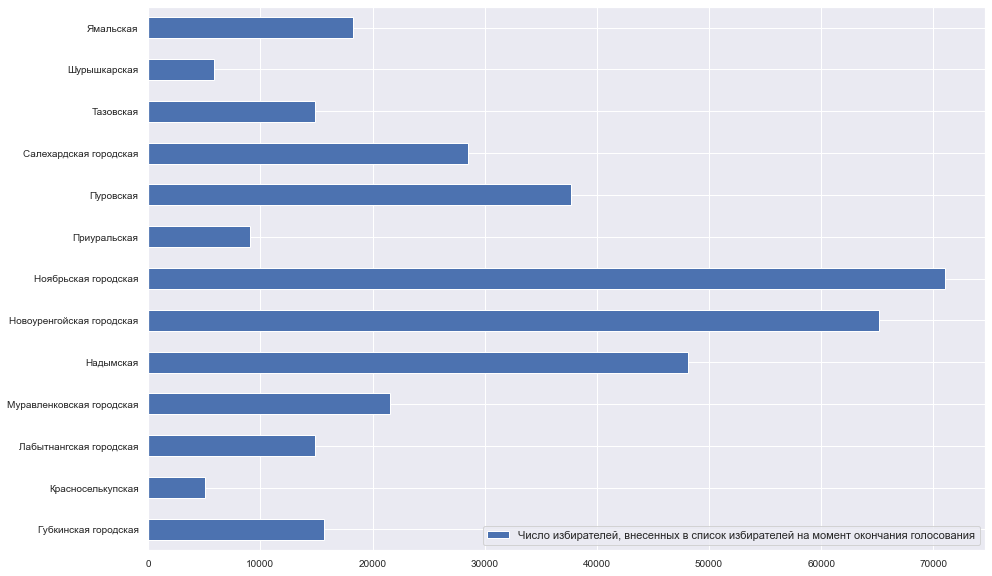

In [281]:
# Построим бар плот. Даже такая косвенная метрика дает прдставление о плотности населения ЯНАО
people_number.plot(kind="barh", fontsize=10, figsize=(15,10), legend=True)
pylab.legend (loc=4)

На основании этой статистики можем сделать вывод о большом разрыве между городами и сельскими поселениями (поселения не большие).

In [302]:
# При помощи библиотеки folium загрузим карту мира
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [303]:
import folium
folium.Map()

In [411]:
# Спозиционируемся на ЯНАО
yanao = folium.Map(location = [66.40, 76.40], zoom_start = 4)
yanao

In [341]:
# Сгенерируем новый датафрейм, добавив данные о широте и долготе избирательных комиссий (на самом деле городов,
# в которых комиссия находится, так как на каждый город одна комиссия)
people_number_location = {'location' : ['Губкинская городская', 'Красноселькупская', 'Лабытнангская городская', 'Муравленковская городская', 'Надымская', 'Новоуренгойская городская', 'Ноябрьская городская', 'Приуральская', 'Пуровская', 'Салехардская городская', 'Тазовская', 'Шурышкарская', 'Ямальская'],
        'latitude' : [64.434, 65.704, 66.657, 63.59, 65.31, 66.40, 63.19, 66.56, 65.19, 66.53, 67.22, 65.23, 66.51],
        'longitude' : [76.503, 82.455, 66.418, 75.00, 75.31, 76.40, 75.43, 67.79, 77.46, 66.60, 79.01, 64.41, 70.50],
        'number' : [15644, 5032, 14905, 21518, 48127, 65162, 71062, 9039, 37715, 28515, 14873, 5825, 18226]
                         }
frame = pd.DataFrame(people_number_location)
frame

,location,latitude,longitude,number
0,Губкинская городская,64.434,76.503,15644
1,Красноселькупская,65.704,82.455,5032
2,Лабытнангская городская,66.657,66.418,14905
3,Муравленковская городская,63.590,75.000,21518
4,Надымская,65.310,75.310,48127
5,Новоуренгойская городская,66.400,76.400,65162
6,Ноябрьская городская,63.190,75.430,71062
7,Приуральская,66.560,67.790,9039
8,Пуровская,65.190,77.460,37715
9,Салехардская городская,66.530,66.600,28515


In [342]:
# Сгенеируем тепловую карту, наложенную на карту ЯНАО, на которой отображается избирательная активность 
# (а мы помним, что мы ее увязали с численностью района в целом)
from folium.plugins import HeatMap
frame['count'] = 1
base_map = generateBaseMap()
HeatMap(data=frame[['latitude', 'longitude', 'number']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=13, max_zoom=4).add_to(base_map)

In [345]:
def generateBaseMap(default_location=[66.40, 76.40], default_zoom_start=5):
    #base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    base_map = yanao
    return base_map
base_map

Тепловая карта подтверждает выводы предыдущего графика о неравномерности плотности населения.

In [327]:
# Сгенерируем датафрейм с типом местоности
location_type = {
        'type' : ['Город','Село','Город', 'Город','Село','Город','Город','Село','Село', 'Город', 'Село', 'Село', 'Село'],
        'number' : [15644, 5032, 14905, 21518, 48127, 65162, 71062, 9039, 37715, 28515, 14873, 5825, 18226]
                         }
frame1 = pd.DataFrame(location_type)
frame1

,type,number
0,Город,15644
1,Село,5032
2,Город,14905
3,Город,21518
4,Село,48127
5,Город,65162
6,Город,71062
7,Село,9039
8,Село,37715
9,Город,28515


<AxesSubplot:xlabel='type', ylabel='count'>

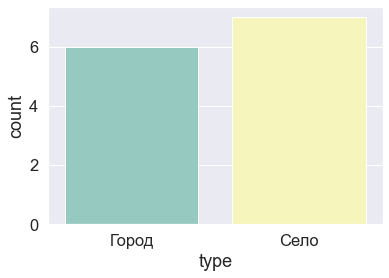

In [331]:
#Построим boxplot с агрегацией по типу местности. Видим, что превалирует население сельской местности.
sns.countplot(frame1['type'], palette="Set3")

При численном скоплении населения в городах, мы видим, что суммарно население сельской местности (оленеводы) превалирует над горожанами.

In [403]:
# Возьмем другой датасет и посмотрим статистику по партиям. Создадим словарь коротких имен
parties = ['Родина','Коммунисты России','Партия пенсионеров','Единая Россия', 'Зеленые', 'Гражданская платформа', 'ЛДПР', 'ПАРНАС', 'Партия роста',
         'Гражданская сила', 'Яблоко', 'КПРФ', 'Патриоты России','Справедливая Россия']

<AxesSubplot:>

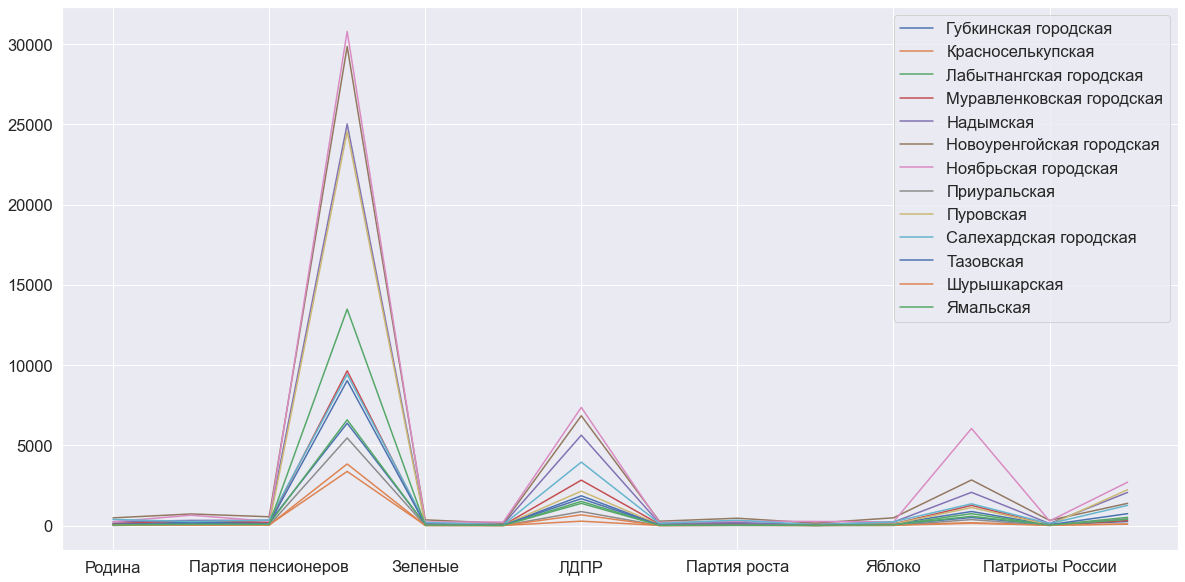

In [335]:
# Постром plot распределения количества голосов по партиям
df = partii_number.iloc[:,1:]
df.index = parties
df.plot(legend=True, figsize=(20,10))

Ожидаемое распределение голосов по партиям. Лидуруют "Единая Россия", ЛДПР, КПРФ. 

In [402]:
# Теперь посмотрим процентное распределение голосов по партиям
mapData = partii_percent.iloc[:,1:]
mapData.index = parties

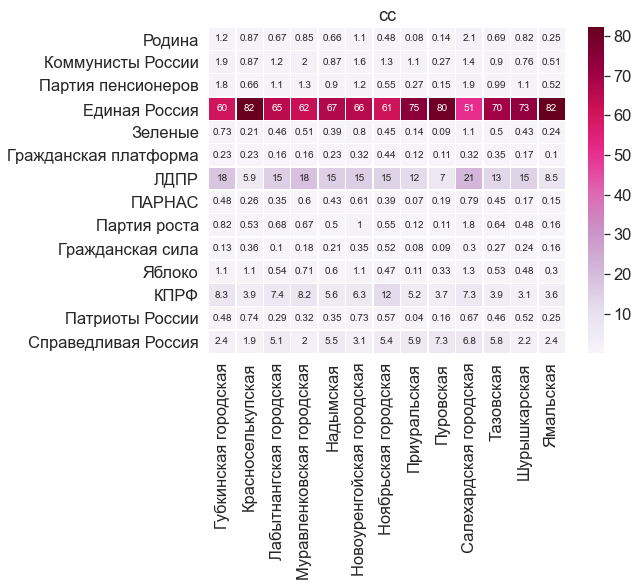

In [409]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(mapData,linewidths=.5,annot=True, cmap='PuRd')
plt.title('cc')
plt.show()

Тепловая карта еще нагляднее демонстирует лидерство трех партий (Единая Россия", ЛДПР, КПРФ). Причем единоросы находят большую поддержку у сельского населения, нежели у городского.